In [3]:
import pandas as pd
import xgboost as xgb
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [3]:
df_usa = pd.read_csv('Yan_reply_First_last_wtime.csv')
df_dutch = pd.read_excel('dutch.xlsx')
df_france = pd.read_excel('french.xlsx')
df_china = pd.read_excel('time_series_375_prerpocess_en.xlsx', index_col=[0,1])
df_china = df_china.groupby('PATIENT_ID').last()

df_new = pd.read_csv('dataset.csv')
dictio = {True:1, False:0}
df_new['outcome'] = df_new['Degree_Severe'].map(dictio)

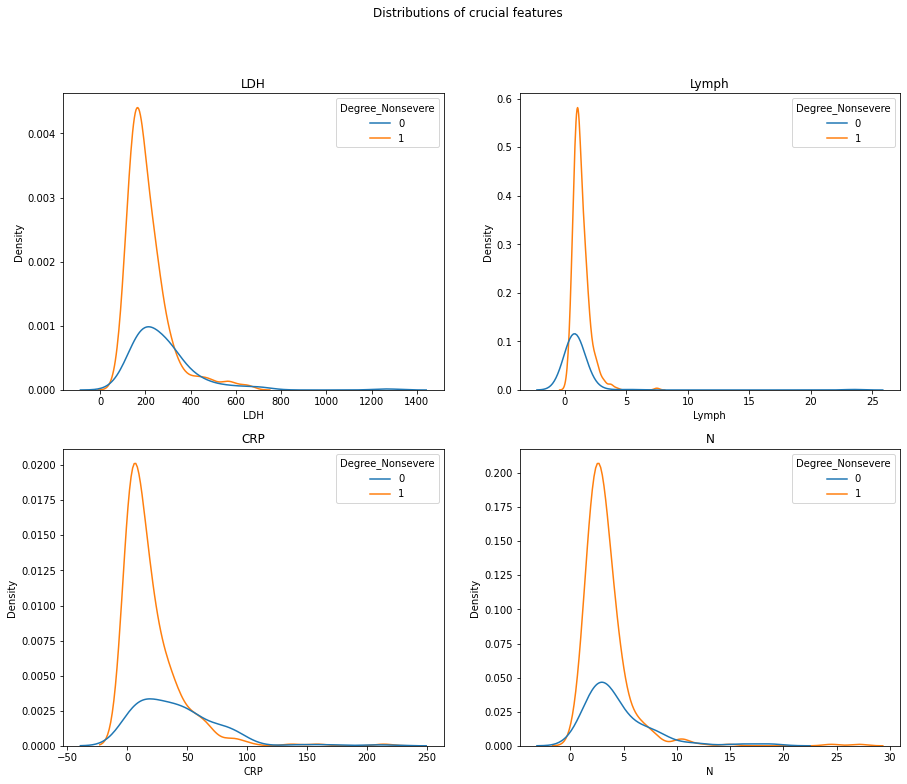

In [4]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

sns.kdeplot(data = df_new, x="Laboratory_test_LDH_(U/L)", hue="Degree_Nonsevere", ax = ax1)
ax1.set_title("LDH")
ax1.set_xlabel('LDH')
#ax1.set_xlim([0, 1300])

sns.kdeplot(data = df_new, x="Laboratory_test_L", hue="Degree_Nonsevere", ax = ax2)
ax2.set_title("Lymph")
ax2.set_xlabel('Lymph')
#ax2.set_xlim([0, 1300])

sns.kdeplot(data = df_new, x="Laboratory_test_CRP_(mg/L)", hue="Degree_Nonsevere", ax = ax3)
ax3.set_title("CRP")
ax3.set_xlabel('CRP')
#ax3.set_xlim([0, 1300])

sns.kdeplot(data = df_new, x="Laboratory_test_N", hue="Degree_Nonsevere", ax = ax4)
ax4.set_title("N")
ax4.set_xlabel('N')
#ax4.set_xlim([0, 1300])

plt.suptitle('Distributions of crucial features')
plt.show()

In [5]:
# https://apteline.pl/artykuly/co-to-jest-morfologia-krwi-obwodowej-jak-odczytac-wyniki-morfologii-krwi
# ta strona mówi, że tak się to mniej więcej skaluje, zeby było w % jak w innych zbiorach, ale nie wiem czy można ufać

df_new['lymph'] = df_new['Laboratory_test_L'] * 10

In [6]:
def draw_plot(df1, main_feature1, div_feature1, title1,
              df2, main_feature2, div_feature2, title2,
              df3, main_feature3, div_feature3, title3,
              feature_name, title, lim):
    
    fig, ax = plt.subplots(2, 3, figsize=(18, 4))
    fig.suptitle(title)

    sns.stripplot(x=main_feature1, y=df1[div_feature1].astype(str),
                  data=df1, dodge=True, alpha=.4, zorder=1, palette=["g", "m"], ax=ax[0][0], order=["0", "1"])
    ax[0][0].set_title(title1)
    ax[0][0].set(xlim=(0, lim))
    ax[0][0].set(xlabel="")
    ax[0][0].set(ylabel="Survival/death")
    ax[0][0].set_yticklabels(["Alive", "Deceased"])

    sns.stripplot(x=main_feature2, y=df2[div_feature2].astype(str),
                  data=df2, dodge=True, alpha=.4, zorder=1, palette=["g", "m"], ax=ax[0][1], order=["0", "1"])
    ax[0][1].set_title(title2)
    ax[0][1].set(xlim=(0, lim))
    ax[0][1].set(ylabel="")
    ax[0][1].set_yticklabels(["Alive", "Deceased"])
    ax[0][1].set(xlabel="")

    sns.stripplot(x=main_feature3, y=df3[div_feature3].astype(str),
                  data=df3, dodge=True, alpha=.4, zorder=1, palette=["g", "m"], ax=ax[0][2], order=["0", "1"])
    ax[0][2].set_title(title3)
    ax[0][2].set(xlim=(0, lim))
    ax[0][2].set(ylabel="")
    ax[0][2].set_yticklabels(["Alive", "Deceased"])
    ax[0][2].set(xlabel="")

    sns.boxplot(y=df1[div_feature1].astype(str), x=main_feature1, data=df1, ax=ax[1][0], palette=["g", "m"], linewidth=1, fliersize=3, order=["0", "1"])
    ax[1][0].set(xlim=(0, lim))
    ax[1][0].set(xlabel=feature_name)
    ax[1][0].set(ylabel="Survival/death")
    ax[1][0].set_yticklabels(["Alive", "Deceased"])

    sns.boxplot(y=df2[div_feature2].astype(str), x=main_feature2, data=df2, ax=ax[1][1], palette=["g", "m"],linewidth=1, fliersize=3, order=["0", "1"])
    ax[1][1].set(xlim=(0, lim))
    ax[1][1].set(xlabel=feature_name)
    ax[1][1].set(ylabel="")
    ax[1][1].set_yticklabels(["Alive", "Deceased"])

    sns.boxplot(y=df3[div_feature3].astype(str), x=main_feature3, data=df3, ax=ax[1][2], palette=["g", "m"],linewidth=1, fliersize=3, order=["0", "1"])
    ax[1][2].set(xlim=(0, lim))
    ax[1][2].set(xlabel=feature_name)
    ax[1][2].set(ylabel="")
    ax[1][2].set_yticklabels(["Alive", "Deceased"])

    plt.subplots_adjust(wspace=0.35, hspace=0.35, top=0.85)

    sns.despine()
    #fig.savefig('ldh_usa.png', dpi=fig.dpi)
    plt.show()

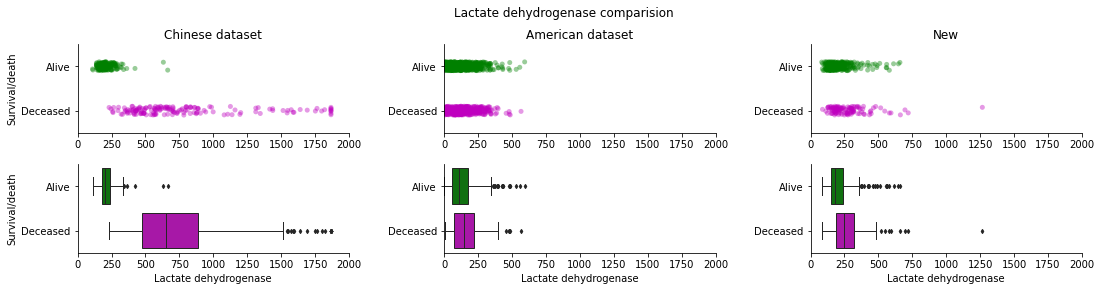

In [7]:
draw_plot(df_china, 'Lactate dehydrogenase', 'outcome', 'Chinese dataset',
          df_usa, 'First_CRP', 'Expired_Outcome', 'American dataset',
          df_new, 'Laboratory_test_LDH_(U/L)', 'outcome', 'New',
          'Lactate dehydrogenase', 'Lactate dehydrogenase comparision', 2000)

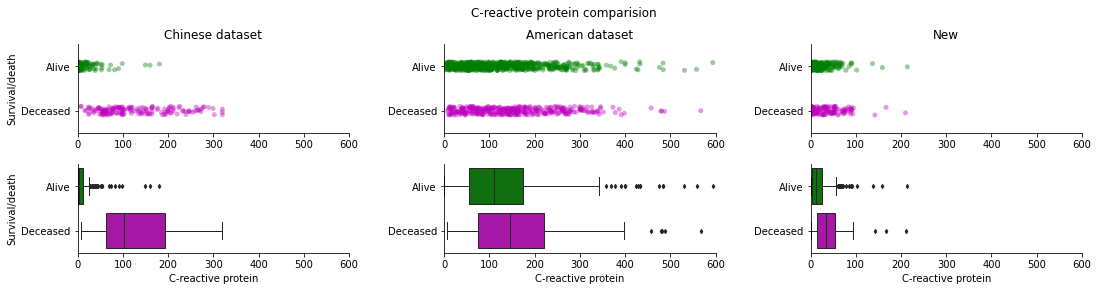

In [8]:
draw_plot(df_china, 'High sensitivity C-reactive protein', 'outcome', 'Chinese dataset',
          df_usa, 'First_CRP', 'Expired_Outcome', 'American dataset',
          df_new, 'Laboratory_test_CRP_(mg/L)', 'outcome', 'New',
          'C-reactive protein', 'C-reactive protein comparision', 600)

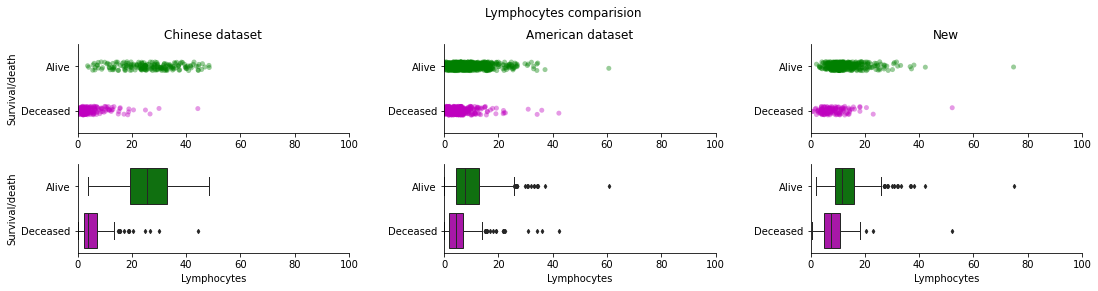

In [9]:
draw_plot(df_china, '(%)lymphocyte', 'outcome', 'Chinese dataset',
          df_usa, 'First_Lymph', 'Expired_Outcome', 'American dataset',
          df_new, 'lymph', 'outcome', 'New',
          'Lymphocytes', 'Lymphocytes comparision', 100)

[Text(0, 0, 'Alive'), Text(0, 1, 'Deceased')]

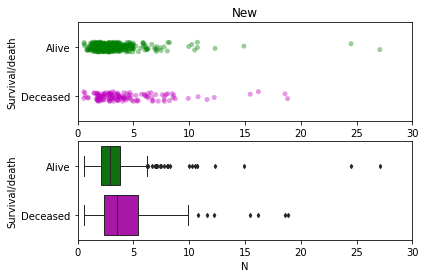

In [10]:
fig, ax = plt.subplots(2, figsize=(6, 4))

sns.stripplot(x='Laboratory_test_N', y=df_new['outcome'].astype(str),
                  data=df_new, dodge=True, alpha=.4, zorder=1, palette=["g", "m"], ax=ax[0], order=["0", "1"])
ax[0].set_title('New')
ax[0].set(xlim=(0, 30))
ax[0].set(xlabel="")
ax[0].set(ylabel="Survival/death")
ax[0].set_yticklabels(["Alive", "Deceased"])
    
sns.boxplot(y=df_new['outcome'].astype(str), x='Laboratory_test_N', data=df_new, ax=ax[1], palette=["g", "m"], linewidth=1, fliersize=3, order=["0", "1"])
ax[1].set(xlim=(0, 30))
ax[1].set(xlabel='N')
ax[1].set(ylabel="Survival/death")
ax[1].set_yticklabels(["Alive", "Deceased"])

# XGBoost na innych zmiennych

In [4]:
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, roc_auc_score

In [7]:
data = pd.read_csv('data_processed.csv') # dane z artykułu po usunięciu braków

In [6]:
dictio = {True:1, False:0}
data['any_Underlying']=data['any_Underlying'].map(dictio)
data['any_Symptoms']=data['any_Symptoms'].map(dictio)
data['Degree_Severe']=data['Degree_Severe'].map(dictio)
data['Laboratory_test_L'] = data['Laboratory_test_L'] * 10
data.head()

Interval   Age  Laboratory_test_WBC  Laboratory_test_L  Laboratory_test_N  \
0       9.0  30.0                 3.32                9.1               1.77   
1      27.0  54.0                 2.58                3.4               1.94   
2       6.0  29.0                 6.79               22.5               4.10   
3       8.0  84.0                19.64                3.7              18.59   
4      31.0  43.0                 3.02                6.8               2.08   

   Laboratory_test_CRP_(mg/L)  Laboratory_test_D_dimer_(ug/ml)  \
0                       0.785                             1.12   
1                      16.300                             0.27   
2                       4.750                             0.37   
3                       6.530                             0.63   
4                      32.700                             0.16   

   Laboratory_test_ALT_(U/L)  Laboratory_test_AST_(U/L)  \
0                       16.8                       28.2   
1                       19.0                       26.9   
2                       25.1                       23.4   
3                       21.0                       38.0   
4                       15.3                       24.5   

   Laboratory_test_TB_(umol/L)  ...  Symptoms_Fever  Symptoms_Cough  \
0                         4.94  ...             1.0             1.0   
1                        11.03  ...             1.0             0.0   
2                        24.80  ...             1.0             1.0   
3                         9.89  ...             1.0             1.0   
4                        14.82  ...             1.0             1.0   

   Symptoms_Dyspnea  Symptoms_Fatigue  Symptoms_Nausea/Emesis  \
0               0.0               0.0                     0.0   
1               1.0               1.0                     0.0   
2               0.0               0.0                     0.0   
3               0.0               1.0                     0.0   
4               0.0               0.0                     0.0   

   Symptoms_Myalgia  Symptoms_Dizziness/Headache  any_Underlying  \
0               0.0                          0.0               0   
1               0.0                          0.0               0   
2               0.0                          0.0               0   
3               0.0                          0.0               1   
4               0.0                          0.0               0   

   any_Symptoms  Degree_Severe  
0             1              0  
1             1              0  
2             1              0  
3             1              1  
4             1              0  

[5 rows x 33 columns]

In [8]:
# Function for model score print
def model_metrics(Y, Y_pred):
    
    Metrics = []
    Metrics.append(accuracy_score(Y, Y_pred))
    Metrics.append(recall_score(Y, Y_pred))
    Metrics.append(precision_score(Y, Y_pred))
    Metrics.append(f1_score(Y, Y_pred))
    Metrics.append(roc_auc_score(Y, Y_pred))
    
    print("Confusion Matrix:")
    print(confusion_matrix(Y, Y_pred))
    print("###################")
    print("Accuracy: ", Metrics[0])
    print("Recall: ", Metrics[1])
    print("Precision: ", Metrics[2])
    print("F1: ", Metrics[3])
    print("ROC-AUC: ", Metrics[4])
    
    return Metrics

### Model na age, ldh, crp i limph

In [9]:
import xgboost as xgb
from xgboost import XGBClassifier

In [10]:
X = data[['Age', 'Laboratory_test_L', 'Laboratory_test_CRP_(mg/L)', 'Laboratory_test_LDH_(U/L)']]
X.columns = ['age', 'lymph', 'crp', 'ldh']
Y = data['Degree_Severe']
X_train, X_test, Y_train , Y_test = train_test_split(X, Y, stratify = Y, test_size = 0.3, random_state = 42)

In [11]:
params =  {'max_depth': 8, 'alpha': 4.0, 'colsample_bytree': 0.9, 'eta': 0.25, 'gamma': 1, 'lambda': 2,
                              'min_child_weight': 7.0, 'scale_pos_weight': 20.0,
                             'subsample': 0.9,
                             'n_estimators': 120,"random_state":42}

model_xgb = XGBClassifier(**params)

model_xgb.fit(X_train, Y_train)
y_pred = model_xgb.predict(X_test)
xgb_score = model_metrics(Y_test, y_pred)

Confusion Matrix:
[[42 10]
 [ 0 13]]
###################
Accuracy:  0.8461538461538461
Recall:  1.0
Precision:  0.5652173913043478
F1:  0.7222222222222222
ROC-AUC:  0.9038461538461539


### Model taki jak w artykule na ldh, crp, limph i n

In [12]:
X2 = data[['Laboratory_test_N', 'Laboratory_test_L', 'Laboratory_test_CRP_(mg/L)', 'Laboratory_test_LDH_(U/L)']]
X_train2, X_test2, Y_train2 , Y_test2 = train_test_split(X2, Y, stratify = Y, test_size = 0.3, random_state = 42)

model_xgb2 = XGBClassifier(**params)

model_xgb2.fit(X_train2, Y_train2)
y_pred2 = model_xgb2.predict(X_test2)
model_metrics(Y_test2, y_pred2)

Confusion Matrix:
[[42 10]
 [ 1 12]]
###################
Accuracy:  0.8307692307692308
Recall:  0.9230769230769231
Precision:  0.5454545454545454
F1:  0.6857142857142856
ROC-AUC:  0.8653846153846154


[0.8307692307692308,
 0.9230769230769231,
 0.5454545454545454,
 0.6857142857142856,
 0.8653846153846154]

### Test modelu na chińskich danych

całkiem fajne wyniki

In [13]:
china_new = pd.read_csv('china_processed.csv') #przetworzone chińskie dane

In [14]:
X_china = china_new[['age', 'First_Lymph', 'First_CRP', 'First_LDH']]
X_china.columns = ['age', 'lymph', 'crp', 'ldh']
Y_china = china_new['outcome']

X_china

age  lymph    crp     ldh
0     73   22.6   43.1   306.0
1     61    7.5   27.4   738.0
2     70   19.1   42.3   328.0
3     74   12.5  108.2   338.0
4     29   37.9    7.0   195.0
..   ...    ...    ...     ...
346   63   15.0  152.0   573.0
347   79    1.6  320.0   276.0
348   61    6.3  205.8   702.0
349   33    2.3  196.8  1385.0
350   68    9.9   58.5   915.0

[351 rows x 4 columns]

In [15]:
y_china_pred = model_xgb.predict(X_china)
model_metrics(y_china_pred, Y_china)

Confusion Matrix:
[[133   8]
 [ 59 151]]
###################
Accuracy:  0.8091168091168092
Recall:  0.719047619047619
Precision:  0.949685534591195
F1:  0.8184281842818427
ROC-AUC:  0.8311550151975684


[0.8091168091168092,
 0.719047619047619,
 0.949685534591195,
 0.8184281842818427,
 0.8311550151975684]

### Test na niderlandzkich danych

tutaj gorzej, sprawdzialem poprawnosc na przyjeciach do ICU i zgonach osobno, wyniki są podobne

In [16]:
ned = pd.read_excel('dutch.xlsx')
dict1 = {'Alive' : 0, 'Deceased' : 1}
ned = ned.replace({'Survival/death': dict1})
dict2 = {'Yes' : 1, 'No' : 0}
ned = ned.replace({'Admission to ICU': dict2})

ned.head()

X_ned = ned[['Age', 'Lymphocytes', 'CRP', 'LD']]
X_ned.columns = ['age', 'lymph', 'crp', 'ldh']
Y_ned_icu = ned['Admission to ICU']
Y_ned_d = ned['Survival/death']

In [17]:
y_ned_pred = model_xgb.predict(X_ned)

model_metrics(Y_ned_icu, y_ned_pred)

Confusion Matrix:
[[ 58 205]
 [  1  41]]
###################
Accuracy:  0.32459016393442625
Recall:  0.9761904761904762
Precision:  0.16666666666666666
F1:  0.2847222222222222
ROC-AUC:  0.5983613977910556


[0.32459016393442625,
 0.9761904761904762,
 0.16666666666666666,
 0.2847222222222222,
 0.5983613977910556]

In [18]:
model_metrics(Y_ned_d, y_ned_pred)

Confusion Matrix:
[[ 59 185]
 [  0  61]]
###################
Accuracy:  0.39344262295081966
Recall:  1.0
Precision:  0.24796747967479674
F1:  0.39739413680781754
ROC-AUC:  0.6209016393442623


[0.39344262295081966,
 1.0,
 0.24796747967479674,
 0.39739413680781754,
 0.6209016393442623]